# Imports

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from prophet import Prophet

# Read data

In [3]:
df = pd.read_csv("../time-series/data/energy.csv")

In [4]:
df.head()

,Timestamp,Power(kW),Temperature Tower Base
0,2021-08-01 00:00:00,314.329987,34.0
1,2021-08-01 00:10:00,274.061676,34.0
2,2021-08-01 00:20:00,304.256653,34.0
3,2021-08-01 00:30:00,337.008331,34.0
4,2021-08-01 00:40:00,377.706665,34.0


<AxesSubplot:xlabel='Timestamp'>

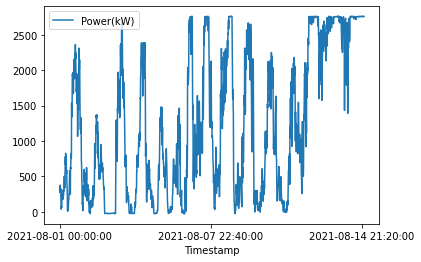

In [7]:
series = df["Timestamp"]

xt = np.arange(series.index.min(), series.index.max())
xt = xt[xt%1000==0]

df.plot(x="Timestamp", y="Power(kW)", xticks=xt)

## Rename columns to fit Prophet

In [10]:
df.rename(columns={"Timestamp": "ds", "Power(kW)": "y"}, inplace=True)

In [11]:
df.head()

,ds,y,Temperature Tower Base
0,2021-08-01 00:00:00,314.329987,34.0
1,2021-08-01 00:10:00,274.061676,34.0
2,2021-08-01 00:20:00,304.256653,34.0
3,2021-08-01 00:30:00,337.008331,34.0
4,2021-08-01 00:40:00,377.706665,34.0


# Train Prophet model
No extra regressor for this model

In [12]:
model = Prophet()

In [13]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -109.53
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1981.37     0.0057068       67.5722      0.1346           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1983.52    0.00179915        67.645           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       1986.76    0.00126972       90.3974   1.113e-05       0.001      320  LS failed, Hessian reset 
     299       1988.51   0.000145114       50.3823      0.1755           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       1988.52   2.61643e-05       55.5768   3.964e-07       0.001      511  LS failed, Hessian reset 
     363       1988.52   1.13343e-05       58.1741   1.941e-07       0.001      597  LS failed, Hessian reset

In [14]:
forecast = model.predict(df)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-01 00:00:00,739.649738,-129.360588,1342.389820,739.649738,739.649738,-88.144284,-88.144284,-88.144284,-88.144284,-88.144284,-88.144284,0.0,0.0,0.0,651.505454
1,2021-08-01 00:10:00,739.489033,-146.446944,1344.860484,739.489033,739.489033,-132.781165,-132.781165,-132.781165,-132.781165,-132.781165,-132.781165,0.0,0.0,0.0,606.707868
2,2021-08-01 00:20:00,739.328328,-148.174146,1364.041254,739.328328,739.328328,-176.312107,-176.312107,-176.312107,-176.312107,-176.312107,-176.312107,0.0,0.0,0.0,563.016221
3,2021-08-01 00:30:00,739.167622,-253.879176,1298.608284,739.167622,739.167622,-218.356046,-218.356046,-218.356046,-218.356046,-218.356046,-218.356046,0.0,0.0,0.0,520.811576
4,2021-08-01 00:40:00,739.006917,-273.922191,1299.036504,739.006917,739.006917,-258.557106,-258.557106,-258.557106,-258.557106,-258.557106,-258.557106,0.0,0.0,0.0,480.449811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2021-08-14 23:10:00,3004.546072,2415.879813,3978.331261,3004.546072,3004.546072,137.578334,137.578334,137.578334,137.578334,137.578334,137.578334,0.0,0.0,0.0,3142.124406
2012,2021-08-14 23:20:00,3008.040533,2376.225276,3840.838706,3008.040533,3008.040533,93.424170,93.424170,93.424170,93.424170,93.424170,93.424170,0.0,0.0,0.0,3101.464704
2013,2021-08-14 23:30:00,3011.534995,2298.470014,3818.132322,3011.534995,3011.534995,48.386681,48.386681,48.386681,48.386681,48.386681,48.386681,0.0,0.0,0.0,3059.921676
2014,2021-08-14 23:40:00,3015.029456,2246.965806,3812.560044,3015.029456,3015.029456,2.846218,2.846218,2.846218,2.846218,2.846218,2.846218,0.0,0.0,0.0,3017.875674


/tmp/ipykernel_618396/2107326233.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


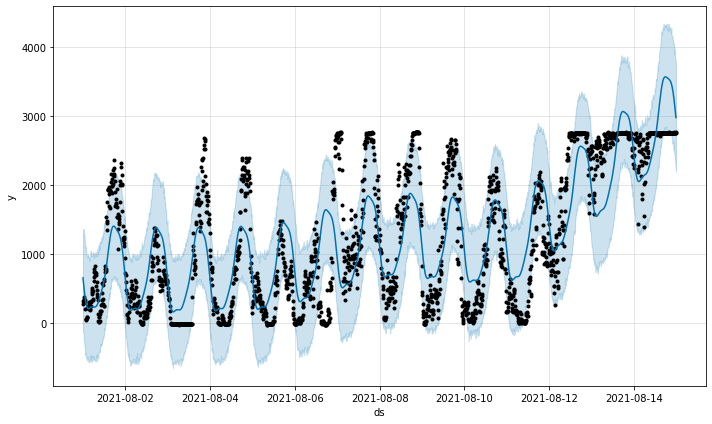

In [17]:
fig = model.plot(forecast)
fig.show()

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_618396/224878137.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


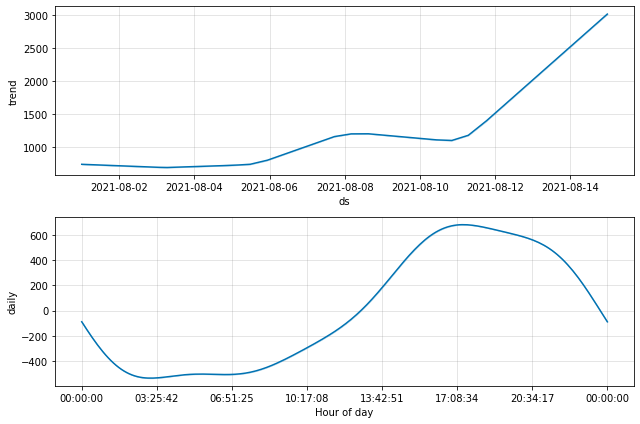

In [18]:
fig = model.plot_components(forecast)
fig.show()

# Make future predictions
- 500 steps
- 5000 teps

In [20]:
future = model.make_future_dataframe(periods=500, freq="10min")

In [21]:
future

,ds
0,2021-08-01 00:00:00
1,2021-08-01 00:10:00
2,2021-08-01 00:20:00
3,2021-08-01 00:30:00
4,2021-08-01 00:40:00
...,...
2511,2021-08-18 10:30:00
2512,2021-08-18 10:40:00
2513,2021-08-18 10:50:00
2514,2021-08-18 11:00:00


In [22]:
df

,ds,y,Temperature Tower Base
0,2021-08-01 00:00:00,314.329987,34.000000
1,2021-08-01 00:10:00,274.061676,34.000000
2,2021-08-01 00:20:00,304.256653,34.000000
3,2021-08-01 00:30:00,337.008331,34.000000
4,2021-08-01 00:40:00,377.706665,34.000000
...,...,...,...
2011,2021-08-14 23:10:00,2757.728271,30.000000
2012,2021-08-14 23:20:00,2758.323242,30.000000
2013,2021-08-14 23:30:00,2759.243408,30.000000
2014,2021-08-14 23:40:00,2761.261719,30.000000


In [23]:
forecast = model.predict(future)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-01 00:00:00,739.649738,-68.457980,1383.298633,739.649738,739.649738,-88.144284,-88.144284,-88.144284,-88.144284,-88.144284,-88.144284,0.0,0.0,0.0,651.505454
1,2021-08-01 00:10:00,739.489033,-123.915590,1415.618262,739.489033,739.489033,-132.781165,-132.781165,-132.781165,-132.781165,-132.781165,-132.781165,0.0,0.0,0.0,606.707868
2,2021-08-01 00:20:00,739.328328,-170.156526,1305.650303,739.328328,739.328328,-176.312107,-176.312107,-176.312107,-176.312107,-176.312107,-176.312107,0.0,0.0,0.0,563.016221
3,2021-08-01 00:30:00,739.167622,-243.331581,1245.958044,739.167622,739.167622,-218.356046,-218.356046,-218.356046,-218.356046,-218.356046,-218.356046,0.0,0.0,0.0,520.811576
4,2021-08-01 00:40:00,739.006917,-274.995064,1307.056161,739.006917,739.006917,-258.557106,-258.557106,-258.557106,-258.557106,-258.557106,-258.557106,0.0,0.0,0.0,480.449811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2021-08-18 10:30:00,4751.776780,3677.080296,5345.431523,4430.479824,5079.528459,-273.448011,-273.448011,-273.448011,-273.448011,-273.448011,-273.448011,0.0,0.0,0.0,4478.328769
2512,2021-08-18 10:40:00,4755.271241,3636.471120,5326.302467,4433.102258,5083.763947,-257.333324,-257.333324,-257.333324,-257.333324,-257.333324,-257.333324,0.0,0.0,0.0,4497.937917
2513,2021-08-18 10:50:00,4758.765702,3696.989525,5312.805383,4435.724691,5087.897865,-240.937660,-240.937660,-240.937660,-240.937660,-240.937660,-240.937660,0.0,0.0,0.0,4517.828043
2514,2021-08-18 11:00:00,4762.260164,3688.633038,5287.136820,4438.347125,5092.012415,-224.182415,-224.182415,-224.182415,-224.182415,-224.182415,-224.182415,0.0,0.0,0.0,4538.077749


/tmp/ipykernel_618396/2107326233.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


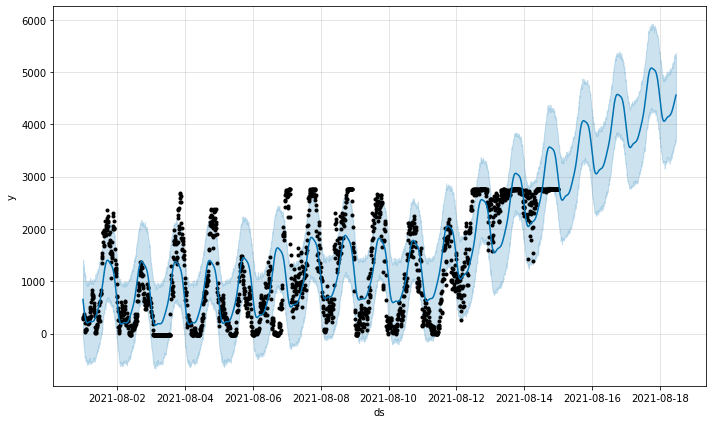

In [25]:
fig = model.plot(forecast)
fig.show()

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


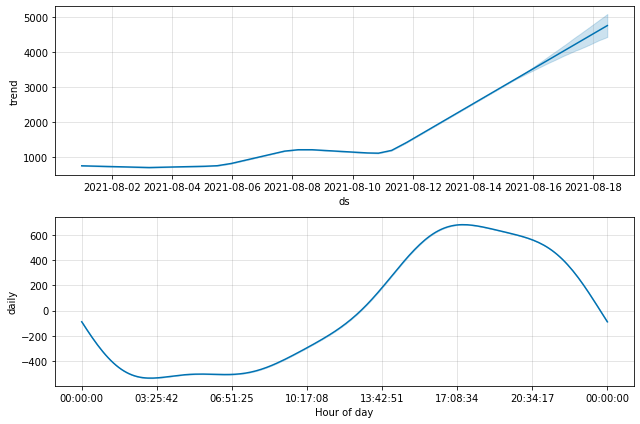

In [26]:
fig = model.plot_components(forecast)

In [27]:
future = model.make_future_dataframe(periods=5000, freq="10min")

In [28]:
future

,ds
0,2021-08-01 00:00:00
1,2021-08-01 00:10:00
2,2021-08-01 00:20:00
3,2021-08-01 00:30:00
4,2021-08-01 00:40:00
...,...
7011,2021-09-18 16:30:00
7012,2021-09-18 16:40:00
7013,2021-09-18 16:50:00
7014,2021-09-18 17:00:00


In [29]:
forecast = model.predict(future)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


/tmp/ipykernel_618396/2107326233.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


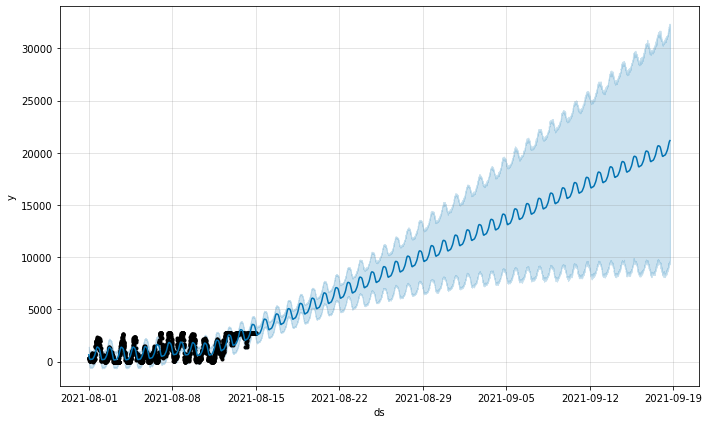

In [30]:
fig = model.plot(forecast)
fig.show()

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_618396/224878137.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


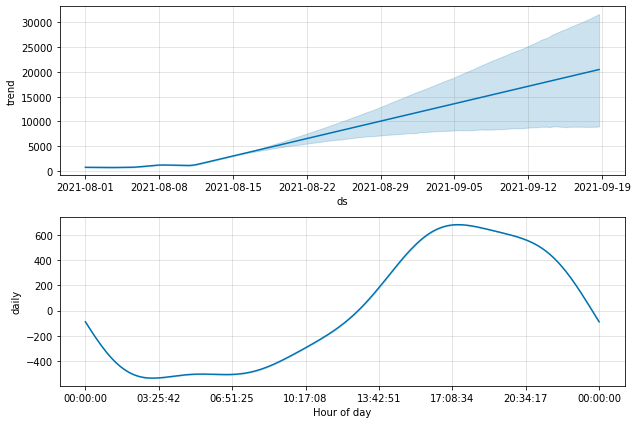

In [31]:
fig = model.plot_components(forecast)
fig.show()

In [32]:
df.head()

,ds,y,Temperature Tower Base
0,2021-08-01 00:00:00,314.329987,34.0
1,2021-08-01 00:10:00,274.061676,34.0
2,2021-08-01 00:20:00,304.256653,34.0
3,2021-08-01 00:30:00,337.008331,34.0
4,2021-08-01 00:40:00,377.706665,34.0


# Train Prophet model with regressor

In [33]:
model = Prophet()

In [34]:
model.add_regressor("Temperature Tower Base")

In [35]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -109.53
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1986.64      0.032459         85.16       4.874      0.4874      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       1989.52    0.00169905       104.825   2.118e-05       0.001      224  LS failed, Hessian reset 
     179       1989.76   6.20952e-05       66.6632   8.958e-07       0.001      324  LS failed, Hessian reset 
     193       1989.76   1.02574e-07       56.2479      0.0707           1      348   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [36]:
forecast = model.predict(df)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


/tmp/ipykernel_618396/2107326233.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


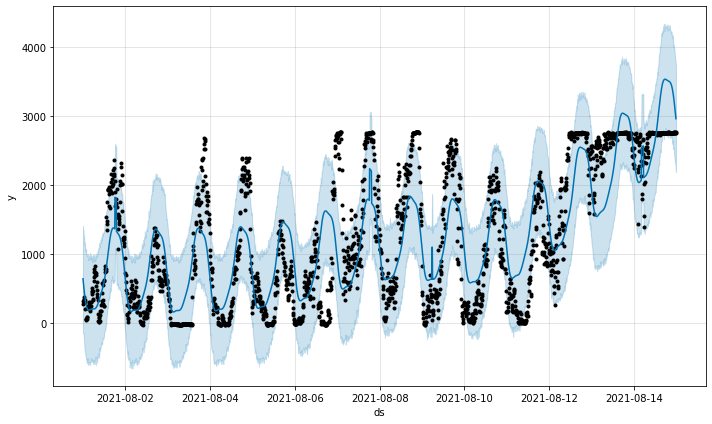

In [37]:
fig = model.plot(forecast)
fig.show()

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_618396/224878137.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


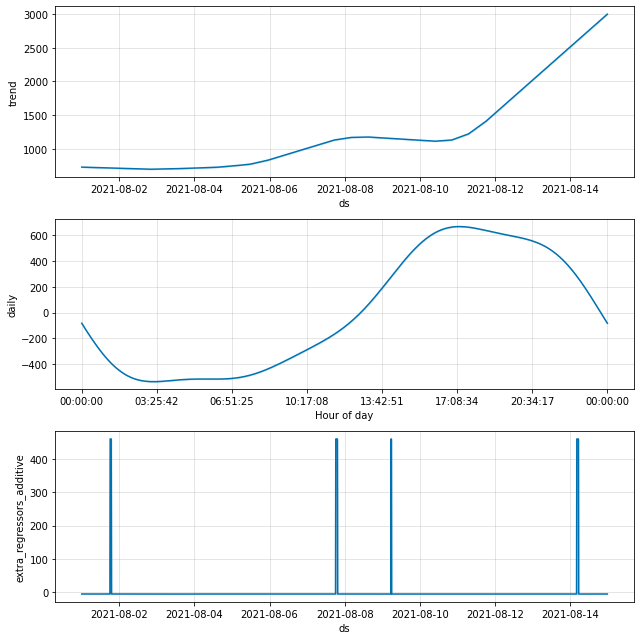

In [38]:
fig = model.plot_components(forecast)
fig.show()

# Train multiple model
One for temprature. The forecast will be used as input for the energy model.

In [39]:
df.head()

,ds,y,Temperature Tower Base
0,2021-08-01 00:00:00,314.329987,34.0
1,2021-08-01 00:10:00,274.061676,34.0
2,2021-08-01 00:20:00,304.256653,34.0
3,2021-08-01 00:30:00,337.008331,34.0
4,2021-08-01 00:40:00,377.706665,34.0


# Temprature model

In [41]:
df_temp = df[["ds", "Temperature Tower Base"]]
df_temp.rename(columns={"Temperature Tower Base": "y"}, inplace=True)

/tmp/ipykernel_618396/2329128721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"Temperature Tower Base": "y"}, inplace=True)


In [42]:
df_temp.head()

,ds,y
0,2021-08-01 00:00:00,34.0
1,2021-08-01 00:10:00,34.0
2,2021-08-01 00:20:00,34.0
3,2021-08-01 00:30:00,34.0
4,2021-08-01 00:40:00,34.0


In [43]:
temp_model = Prophet()
temp_model.fit(df_temp)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -12.4933
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3639.58   7.90478e-05       89.6416           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       3639.93   0.000127519       52.7308   2.049e-06       0.001      230  LS failed, Hessian reset 
     188       3639.94   5.30221e-07       58.6283   7.605e-09       0.001      340  LS failed, Hessian reset 
     189       3639.94   1.28712e-07       63.8455      0.7099      0.7099      341   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [44]:
forecast = temp_model.predict(df_temp)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


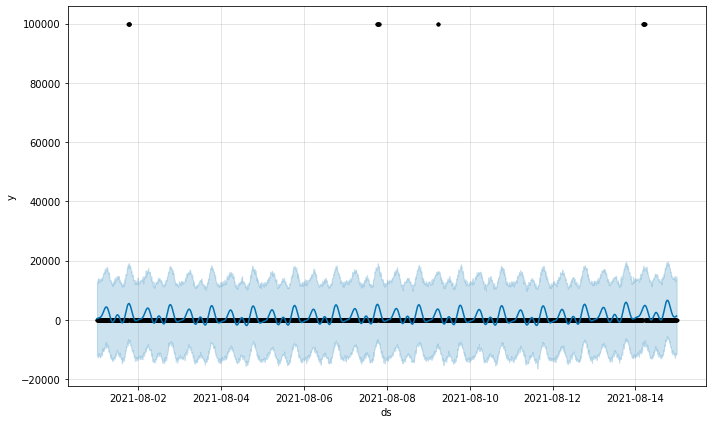

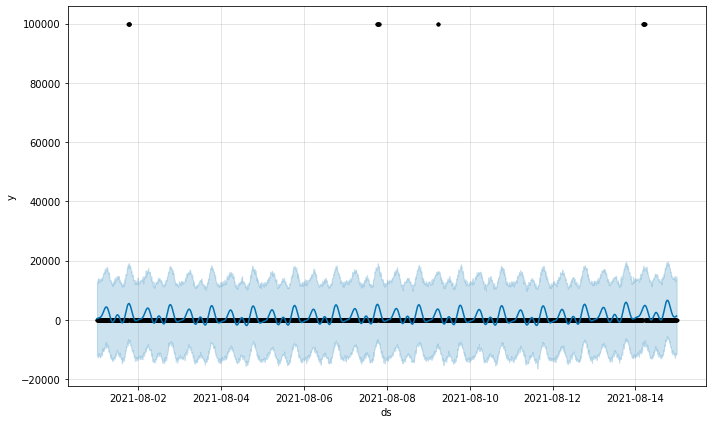

In [45]:
temp_model.plot(forecast)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_618396/1852579438.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


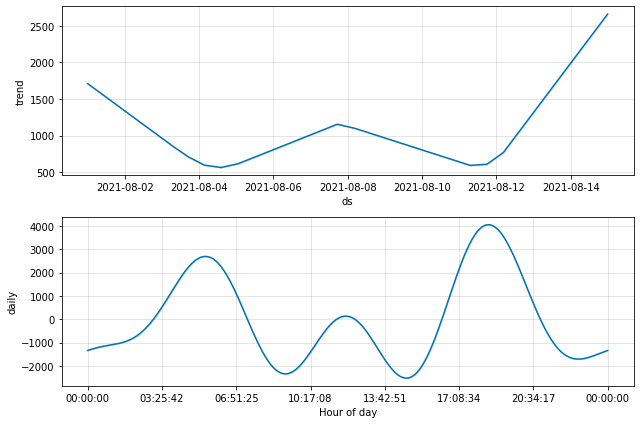

In [46]:
fig = temp_model.plot_components(forecast)
fig.show()

In [63]:
future = temp_model.make_future_dataframe(periods=500, freq="10min")

In [64]:
temp_forecast = temp_model.predict(future)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [66]:
temp_forecast = temp_forecast[["ds", "yhat"]]

In [67]:
temp_forecast.rename(columns={"yhat": "Temperature Tower Base"}, inplace=True)

# Energy model

In [69]:
energy_model = Prophet()

In [70]:
energy_model.add_regressor("Temperature Tower Base")

In [71]:
df.head()

,ds,y,Temperature Tower Base
0,2021-08-01 00:00:00,314.329987,34.0
1,2021-08-01 00:10:00,274.061676,34.0
2,2021-08-01 00:20:00,304.256653,34.0
3,2021-08-01 00:30:00,337.008331,34.0
4,2021-08-01 00:40:00,377.706665,34.0


In [72]:
energy_model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -109.53
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1986.64      0.032459         85.16       4.874      0.4874      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       1989.52    0.00169905       104.825   2.118e-05       0.001      224  LS failed, Hessian reset 
     179       1989.76   6.20952e-05       66.6632   8.958e-07       0.001      324  LS failed, Hessian reset 
     193       1989.76   1.02574e-07       56.2479      0.0707           1      348   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [68]:
temp_forecast

,ds,Temperature Tower Base
0,2021-08-01 00:00:00,373.951623
1,2021-08-01 00:10:00,422.211896
2,2021-08-01 00:20:00,464.759105
3,2021-08-01 00:30:00,501.388983
4,2021-08-01 00:40:00,532.603757
...,...,...
2511,2021-08-18 10:30:00,3874.743840
2512,2021-08-18 10:40:00,4108.811256
2513,2021-08-18 10:50:00,4334.829688
2514,2021-08-18 11:00:00,4545.332123


In [77]:
forecast = energy_model.predict(temp_forecast)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


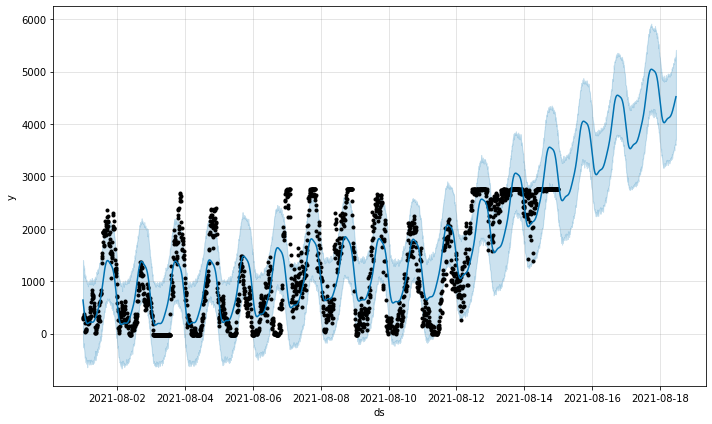

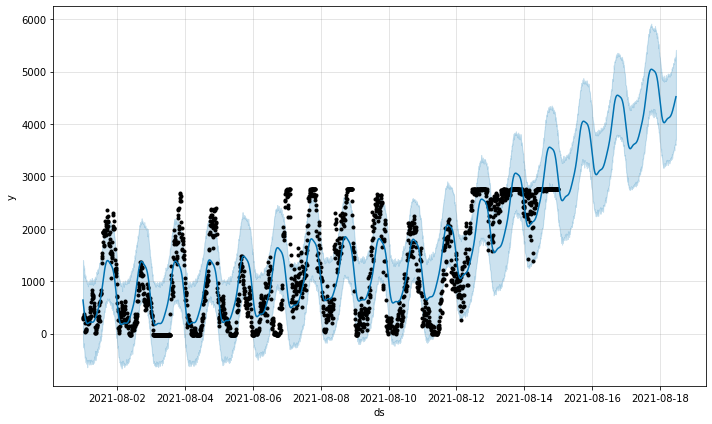

In [78]:
energy_model.plot(forecast)

/home/nyq/ph/vst/ml-dl/ml-dl-env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_618396/477547093.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


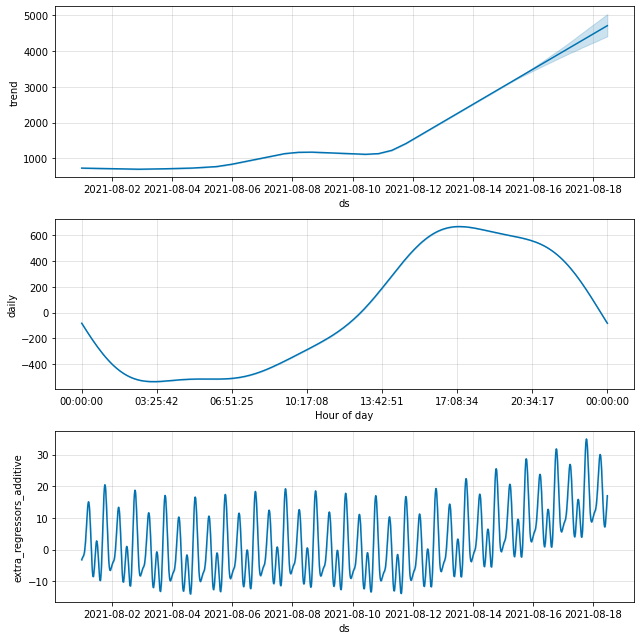

In [81]:
fig = energy_model.plot_components(forecast)
fig.show()